In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imsave
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

In [3]:
im = load_sample_image('china.jpg')

In [4]:
type(im), im.shape

(numpy.ndarray, (427, 640, 3))

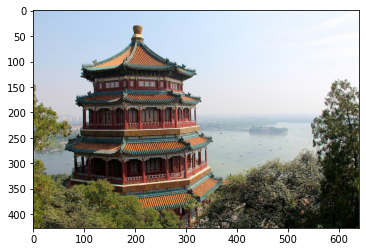

In [5]:
plt.imshow(im)

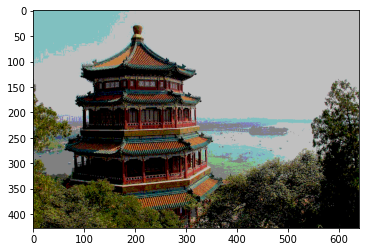

In [6]:
im_codes = im // 64 # zip
im_quant = im_codes * 64 # unzip

plt.imshow(im_quant)

In [7]:
X_im = im.reshape(-1, 3)
len(np.unique(X_im, axis=0))

96615

In [8]:
X_im_quant = im_quant.reshape(-1, 3)
len(np.unique(X_im_quant, axis=0))

37

In [ ]:
kmeans = KMeans(
    n_clusters=64,
    max_iter=10,
    random_state=42
)

In [ ]:
kmeans.fit(X_im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=64, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_[5]

array([236.21954241, 244.28395512, 253.84545322])

In [ ]:
# Compactar
clusters = kmeans.predict(X_im)
im_clusters = clusters.reshape(427, 640)

# Descompactar
im_kmeans = np.zeros(im.shape)
for i in range(im_clusters.shape[0]):
  for j in range(im_clusters.shape[1]):
    cluster_id = im_clusters[i, j]

    im_kmeans[i, j, :] = kmeans.cluster_centers_[cluster_id]

im_kmeans = np.int32(im_kmeans)

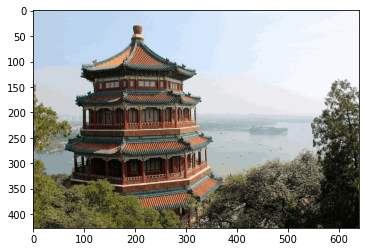

In [ ]:
plt.imshow(im_kmeans)